In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

In [36]:
data = pd.read_csv('CleanedData/disease_vector.csv', header=0, index_col=0)
print

                                         abdominal_pain  \
Disease                                                   
(vertigo) Paroymsal  Positional Vertigo             0.0   
AIDS                                                0.0   
Acne                                                0.0   
Alcoholic hepatitis                                 0.9   
Allergy                                             0.0   
Arthritis                                           0.0   
Bronchial Asthma                                    0.0   
Cervical spondylosis                                0.0   
Chicken pox                                         0.0   
Chronic cholestasis                                 0.9   
Common Cold                                         0.0   
Dengue                                              0.0   
Diabetes                                            0.0   
Dimorphic hemmorhoids(piles)                        0.0   
Drug Reaction                                       0.0 

In [31]:
n_clusters = np.arange(2, 20)
sils = []
sils_err = []
iterations = 20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(data) 
        labels = gmm.predict(data)
        sil = metrics.silhouette_score(data, labels, metric='euclidean')
        tmp_sil.append(sil)
    tmp_sil = np.array(tmp_sil)
    dx = np.argsort(tmp_sil)[:int(iterations/5)]
    val = np.mean(tmp_sil[dx])
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

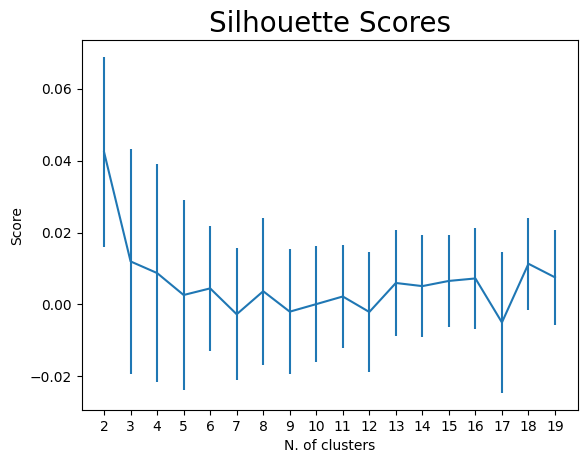

In [32]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

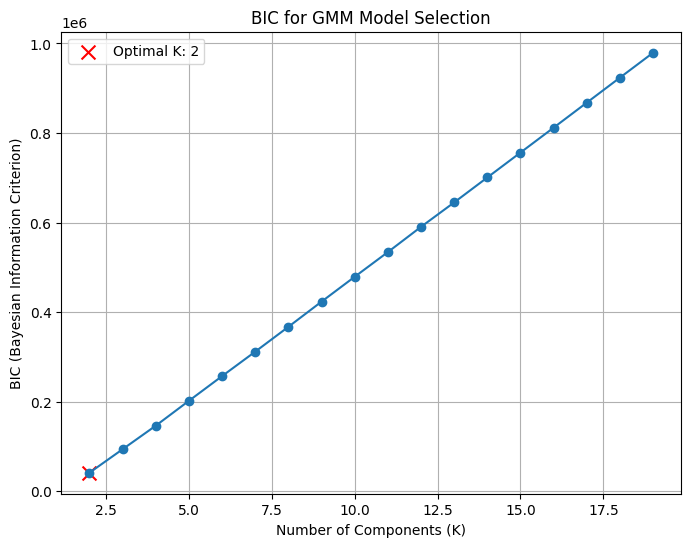

Optimal number of components (K) according to BIC: 2


In [33]:
# Bayesian information criterion (BIC) 1
n_components = np.arange(2, 20)
bic_values = []
# Fit GMM models for different K values and calculate BIC
for n in n_components:
    gmm = GMM(n_components=n, n_init=2, random_state=0)
    gmm.fit(data)
    bic = gmm.bic(data)
    bic_values.append(bic)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Plot the BIC values against the number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components, bic_values, marker='o')
plt.xlabel("Number of Components (K)")
plt.ylabel("BIC (Bayesian Information Criterion)")
plt.title("BIC for GMM Model Selection")
plt.grid(True)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Mark the optimal point on the plot
plt.scatter(optimal_n_components, min(bic_values), c='red', marker='x', s=100, label=f'Optimal K: {optimal_n_components}')
plt.legend()

plt.show()

print("Optimal number of components (K) according to BIC:", optimal_n_components)

In [34]:
# Bayesian information criterion (BIC) 2
n_clusters = np.arange(2, 20)
bics = []
bics_err = []
iterations = 20
for n in n_clusters:
    tmp_bic =[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(data)
        tmp_bic.append(gmm.bic(data))
    tmp_bic = np.array(tmp_bic)
    dx = np.argsort(tmp_bic)[:int(iterations/5)]
    val = np.mean(tmp_bic[dx])
    err = np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

KeyboardInterrupt: 

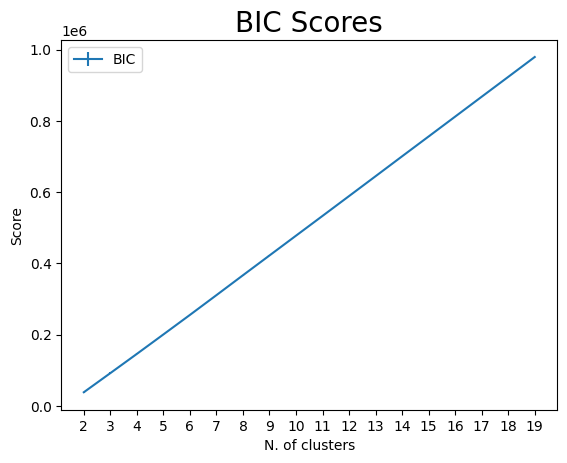

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [61]:
gmm = GMM(30, n_init=2).fit(data) 
labels = gmm.predict(data)

# for i in range(data.shape[0]):
#     print(data.iterrows())

diseases = []

for index, row in data.iterrows():
    diseases.append(index)

for i in range(len(diseases)):
    print(str(diseases[i]) + " " + str(labels[i]))


(vertigo) Paroymsal  Positional Vertigo 5
AIDS 28
Acne 21
Alcoholic hepatitis 0
Allergy 2
Arthritis 18
Bronchial Asthma 28
Cervical spondylosis 23
Chicken pox 9
Chronic cholestasis 1
Common Cold 11
Dengue 4
Diabetes  15
Dimorphic hemmorhoids(piles) 22
Drug Reaction 7
Fungal infection 7
GERD 8
Gastroenteritis 5
Heart attack 8
Hepatitis B 19
Hepatitis C 16
Hepatitis D 16
Hepatitis E 16
Hypertension  23
Hyperthyroidism 13
Hypoglycemia 12
Hypothyroidism 6
Impetigo 27
Jaundice 26
Malaria 25
Migraine 10
Osteoarthristis 18
Paralysis (brain hemorrhage) 5
Peptic ulcer diseae 1
Pneumonia 3
Psoriasis 24
Tuberculosis 17
Typhoid 20
Urinary tract infection 29
Varicose veins 14
hepatitis A 16


In [ ]:
dbs = 